# Amazon Last-Mile Route Challenge Data Analysis
by Guilherme Fernandes Alves, Oct 2022 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime

import numpy as np
import pandas as pd

import lmr_analyzer as lmr


# Testing lmr_analyzer library

Testing package object definition

In [3]:
example_pck = lmr.package(
    name="example_pck",
    dimensions=(25, 10, 7),  # width, height, length (cm)
    status="delivered",
    weight=1.5,  # kg
    price=9.90,  # $
)

example_pck.__dict__


{'name': 'example_pck',
 'dimensions': (25, 10, 7),
 'status': 'delivered',
 'weight': 1.5,
 'price': 9.9,
 'volume': 1750}

Testing stops objects definition

In [4]:
example_stp1 = lmr.stop(
    name="example_stp1",
    location=(0, 0),  # lat, lon
    location_type="pickup",
    time_window=(datetime(2020, 1, 1, 8, 0), datetime(2020, 1, 1, 8, 50)),
    packages=[example_pck],
    planned_service_time=0,
)
example_stp2 = lmr.stop(
    name="example_stp2",
    location=(0, 0),
    location_type="pickup",
    time_window=(datetime(2020, 1, 1, 9, 0), datetime(2020, 1, 1, 9, 10)),
    packages=[example_pck],
    planned_service_time=0,
)
example_stp1.__dict__


{'name': 'example_stp1',
 'location': (0, 0),
 'location_type': 'pickup',
 'time_window': (datetime.datetime(2020, 1, 1, 8, 0),
  datetime.datetime(2020, 1, 1, 8, 50)),
 'packages': [<lmr_analyzer.package.package at 0x19d71c179d0>],
 'planned_service_time': 0,
 'packages_list': [<lmr_analyzer.package.package at 0x19d71c179d0>],
 'status_list': ['delivered']}

Testing route objects definition

In [6]:
r1 = lmr.route(
    name="r1",
    stops=[example_stp1, example_stp2],
)
r1.set_actual_sequence(["example_stp1", "example_stp2"])
# r1.evaluate_route_scores()

r1.__dict__


Hey, I will develop this later.


{'name': 'r1',
 'stops': {'example_stp1': <lmr_analyzer.stop.stop at 0x19d72cdb8d0>,
  'example_stp2': <lmr_analyzer.stop.stop at 0x19d72cdabd0>},
 'departure_time': None,
 'vehicle': None,
 'stops_names': ['example_stp1', 'example_stp2'],
 'number_of_stops': 2,
 'actual_sequence': [<lmr_analyzer.stop.stop at 0x19d72cdb8d0>,
 'number_of_actual_stops': 2,
 'actual_sequence_names': ['example_stp1', 'example_stp2']}

In [8]:
a1 = lmr.analysis(
    name="a1",
    routes=[r1],
)
a1.__dict__


{'name': 'a1',
 'routes': [<lmr_analyzer.route.route at 0x19d72cf7b10>],
 'routes_dict': {'r1': <lmr_analyzer.route.route at 0x19d72cf7b10>}}

# Serializing the data

In [7]:
db = lmr.amz_serializer(
    root_directory="G:/Drives compartilhados/TF Eng Civil PTR - Guilherme_Felipe - 2022/1. BASES/AMAZON-ROUTING-CHALLENGE-2021/almrrc2021/almrrc2021-data-training/model_build_inputs"
)

# Get some nicknames
packages_dict, routes_dict = db.packages_dict, db.routes_dict


package_data.json has been loaded in 13.93 seconds.
route_data.json has been loaded in 15.62 seconds.
actual_sequences.json has been loaded in 2.90 seconds.
We are ready to proceed. All files have been loaded in 32.45 seconds.


In [8]:
db.print_info_by_city()


Number of routes in Los Angeles : 2876
Number of routes in Seattle     : 1079
Number of routes in Chicago     : 1002
Number of routes in Boston      : 929
Number of routes in Austin      : 214
Total number of routes:          6100

Percentage of routes in Los Angeles : 47.15%
Percentage of routes in Seattle     : 17.69%
Percentage of routes in Chicago     : 16.43%
Percentage of routes in Boston      : 15.23%
Percentage of routes in Austin      : 3.51%


# Create the distance matrix object

In [9]:
dist_matrix = lmr.distance_matrix()
dist_matrix.load_support_matrix_file(
    filename="../../data/driving_distances/los_angeles.csv"
)
dist_matrix.calculate_matrix_statistics()
dist_matrix.print_info()
# TODO: Add a __get__ method to the distance_matrix class to return the matrix as a numpy array


Awesome, the distance matrix loaded successfully!
The routes matrix was also loaded and saved as an attribute.
Number of distances stored: 412440
Maximum distance:           133.346 km
Minimum distance:           0.000 km
Average distance:           0.586 km
Standard deviation:         2.968 km


# Analyze the data

In [10]:
los_angeles = lmr.analysis(
    name="los_angeles",
    routes=list(routes_dict["Los Angeles"].values()), # A list of route objects
)


Circuity Factor analysis

In [11]:
los_angeles.calculate_euclidean_distances(planned=False, actual=True)
los_angeles.calculate_driving_distances(
    planned=False, actual_distance_matrix=dist_matrix.routes_matrix
)
los_angeles.calculate_circuity_factor(planned=False, actual=True)


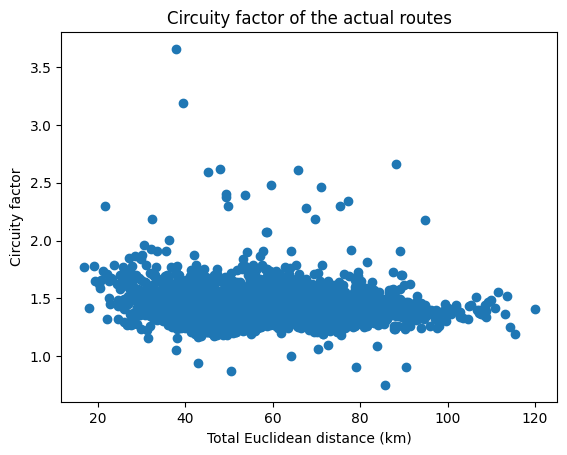

In [12]:
los_angeles.plot_circuity_factor()

Packages status analysis

In [23]:
los_angeles.calculate_packages_status()

Centroid analysis

In [20]:
los_angeles.calculate_centroids()

Calculate bbox areas

In [ ]:
los_angeles.calculate_each_route_bbox()

In [26]:
los_angeles.find_overall_bbox()

Export data to CSV

In [30]:
los_angeles.summarize_by_routes()

{'RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77': {'Name': 'RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77',
  'Centroid Lat - mean - (deg)': 34.09610363559322,
  'Centroid Lon - mean - (deg)': -118.28463171186442,
  'Centroid Lat - stdev - (deg)': 0.0035569612475200778,
  'Centroid Lon - stdev - (deg)': 0.004672390545374135,
  'Number of delivery stops': 118,
  'Number of depot stops': 1,
  'Number of packages': 276,
  'Number of delivered packages': 274,
  'Number of rejected packages': 0,
  'Number of failed attempted packages': 2,
  'Avg packages per stop': 2.3389830508474576,
  'Rejected packages (%)': 0.006258692628650904,
  'Delivered packages (%)': 0.9906428937200317,
  'Failed attempted packages (%)': 0.009330920348214701,
  'Bbox area - (km^2)': 291.9761331135552,
  'Bbox north - (deg)': 34.102251,
  'Bbox south - (deg)': 34.007369,
  'Bbox east - (deg)': -118.143927,
  'Bbox west - (deg)': -118.294127,
  'Total Euclidean distance (km)': 50.14666749652788,
  'Total Driving dista

In [31]:
los_angeles.export_summary_by_routes(filename="summary_by_routes_LA_18nov_v1.csv")